農研機構メッシュ農業気象データシステム(AMGSDS) 　ドキュメント<br>
チュートリアル　７ データの集計

# データの集計
　メッシュ農業気象データから月別値や年別値を得る方法を学びます。

　まず、以下のセルを実行し、このチュートリアルで使用するライブラリを読み込んでください。

In [1]:
# このチュートリアルで使用するライブラリ

import numpy as np
import pandas as pd
import AMD_Tools4 as amd

import xarray as xr

## 1 平均値、合計値の分布図
　関数GetMetDataはメッシュ農業気象データを3次元の配列で返します。漠然と「配列」と書きましたが、正確にはライブラリ Numpy が提供する ndarray というオブジェクトです。一般に、オブジェクトには、多くの場合、メソッドとよばれる計算機能が付随していて、そのオブジェクトならではの処理ができるようになっています。
　ndarray オブジェクトは数字の配列を一まとめに扱うオブジェクトですから、「ならでは」の関数として、合計や平均を計算するメソッド、sum や mean が用意されており、メッシュデータの合計や平均が簡単に計算できます。<br>
 https://numpy.org/doc/stable/reference/generated/numpy.sum.html <br>
 https://numpy.org/doc/stable/reference/generated/numpy.mean.html 

　平均値や合計値の分布を求める例を、以下に二つ示します。

#### 例１
2024年9月の全天日射量分布図を作成する。

まず、この期間の日別全天日射量データを取得します。

In [2]:
# 気象データの取得
nani = 'GSR'                          # 全天日射量
itsu = [ "2024-09-01", "2024-09-30" ] # 期間
doko = [ 34.670833, 35.32916, 136.00625, 136.99375]   #  1次メッシュ5236の領域
data, tim, lat, lon = amd.GetMetData(nani, itsu, doko )

GSR (30, 80, 80) Tile


　気象データは、時間方向に30座標、緯度方向に80座標、経度方向に80座標の配列です。求めるのは、これら全部を足し合わせた答えではなく、それぞれのメッシュにおける時間についての合計なので、下のとおり、メソッドに引数 **axis=0** を与えます。メッシュ農業気象データは、時間(日付)、緯度、経度の順序で配列化されているので、集計を時間方向に限定する場合、最初（ゼロ番目）の次元という意味で0を指定します。

In [3]:
# 日付方向の合計
SdSept = data.sum(axis=0) 

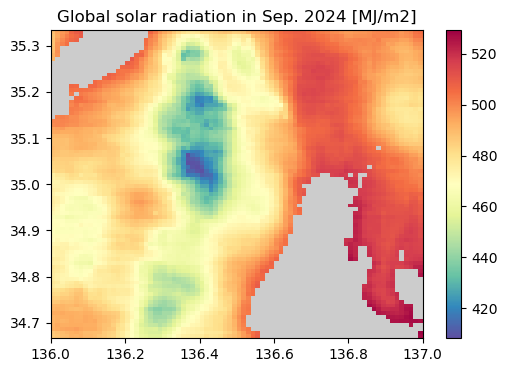

In [4]:
# 分布図の描画
amd.mapfig(SdSept,lat,lon,
       figtitle='Global solar radiation in Sep. 2024 [MJ/m2]')

#### 例２
　2024年の1月から12月までの月平均気温分布図を作成する。

　このような図は、_例１_ を for ループの中に入れて12回まわせば得ることができますが、１年分の気象データを全部取得し、その中から特定の月に属するデータだけを取り出して平均を取る方法で分布図を作成してみましょう。インデックスや時刻の取り扱をよく理解してください。

　まず気象データを取得します。

In [5]:
# 気象データの取得
nani = 'TMP_mea'                      # 日平均気温
itsu = [ "2024-01-01", "2024-12-31" ] # 1年分
doko = [ 34.670833, 35.32916, 136.00625, 136.99375]   #  1次メッシュ5236の領域
data, tim, lat, lon = amd.GetMetData(nani, itsu, doko )

TMP_mea (366, 80, 80) Tile


　次に、時刻の座標 **tim** を加工して、月の値の配列、すなわち、取得したデータの日付座標とおなじ数(366個)の要素を持ち、最初の31個は1、次の29個(この年は閏年)は2、・・、最後の31個は12が入っている整数の配列、を作ります。それは以下で作れます。

In [6]:
# 月が格納されている配列
mm = np.array([dd.month for dd in tim])

In [7]:
mm  # 確認したい場合実行

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

　配列 **tim** を構成する要素は Python標準の日時オブジェクトなので、属性 **month** により、月の数字(1月なら「1」)を取り出すことができます。上のスクリプトでは、この方法で tim のすべての要素から月の数字を取り出してリストにし(リスト内包表記の部分)、さらにそれを、ndarray オブジェクトに変換しています。<br>
 月の数字が格納された配列ができれば、これに関数 numpy.where を適用して、特定の月のデータが格納されているインデックスを得ることができます。

In [8]:
# 指定した月のデータが格納されている要素のインデックスを得るスクリプト
month_i = 2  # 例えば2月
idx = np.where(mm == month_i)

In [9]:
idx  # 確認したい場合実行

(array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64),)

インデックスが分かれば、1年分の気温データから特定月のデータだけを抜き出すことができるので、これに平均を計算するメソッド **mean** を適用します。

In [10]:
datai = data[idx]
Tmonmea = datai.mean(axis=0)

　これで2月の月平均気温のデータができました。可視化します。

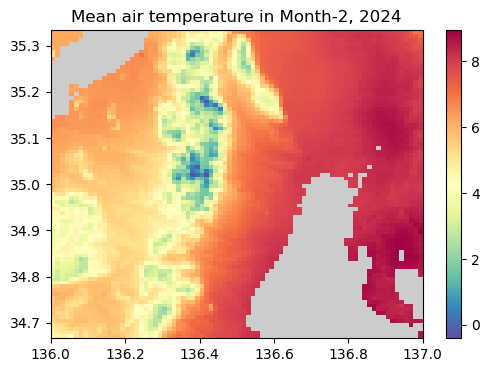

In [11]:
amd.mapfig(Tmonmea, lat, lon, 
        figtitle=f'Mean air temperature in Month-{month_i}, {tim[0].year}')

　細切れに説明したスクリプトをまとめ、さらにforループに納めたものを下に示します(データの取得部分は含めていません)。<br>
　これを実行すると12枚の分布図が表示されます。確認したら左端の青太線をクリックして図を畳んでおいてください。

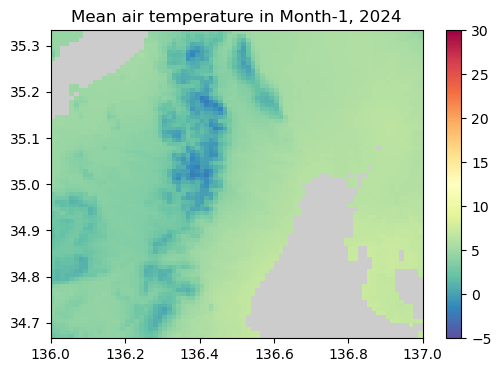

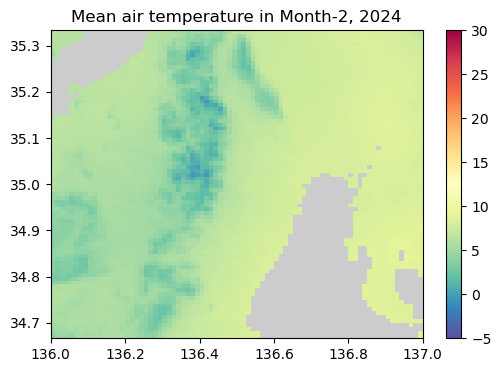

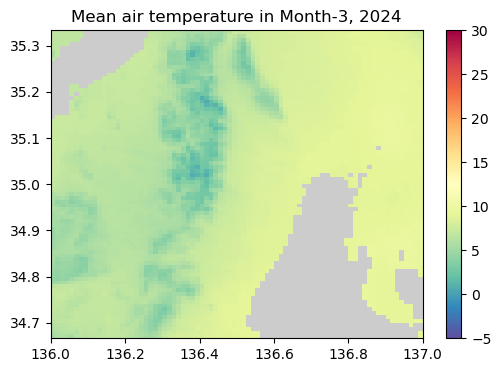

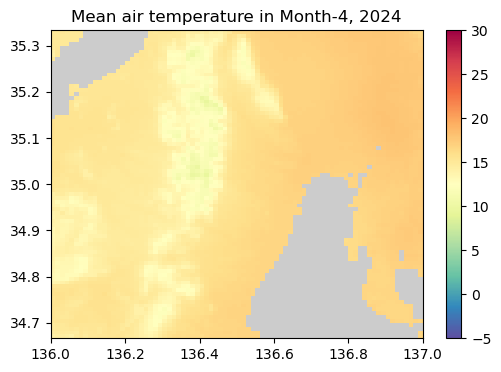

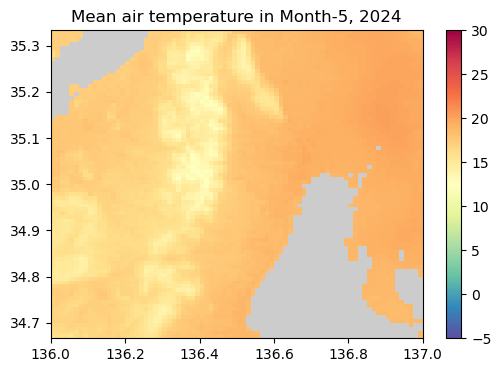

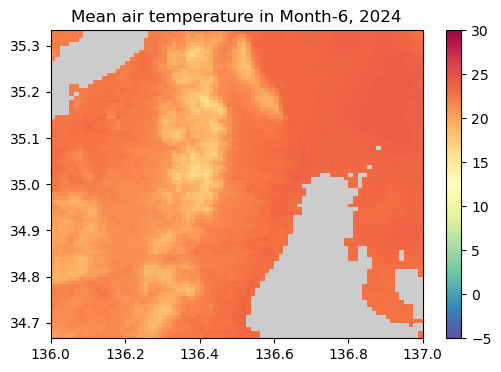

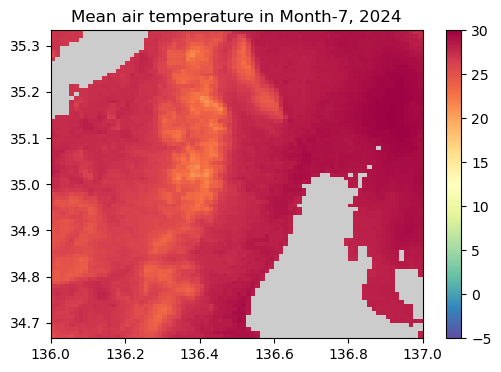

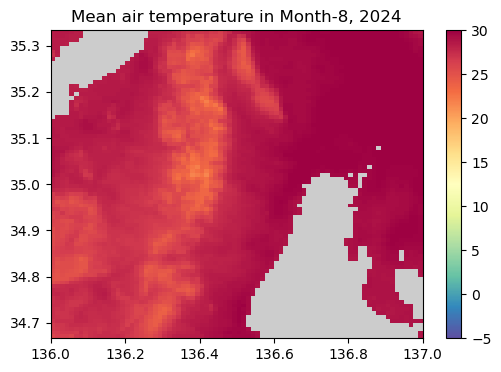

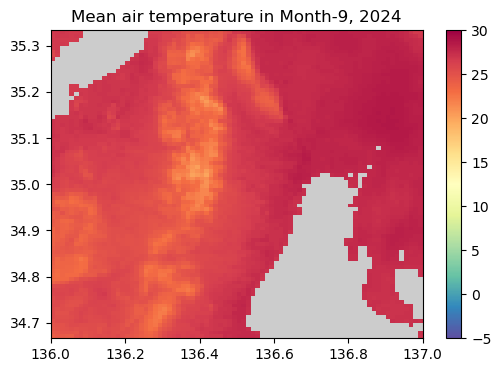

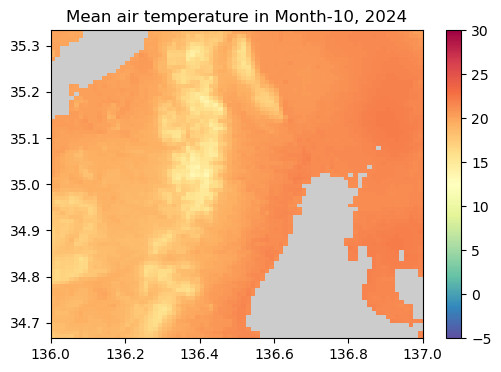

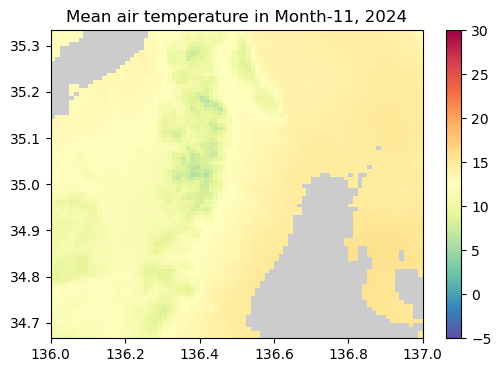

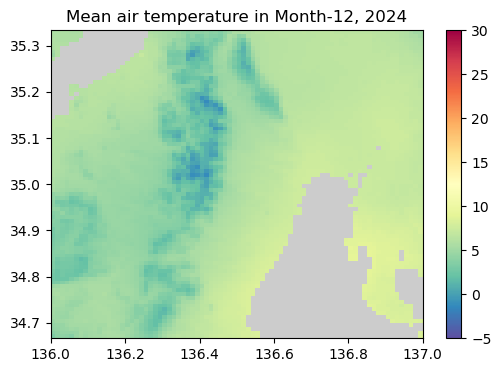

In [12]:
mm = np.array([dd.month for dd in tim])
months = sorted(list(set(mm)))  # mmから重複を除いてソートし[1,2,..,12]を作ってみた
for month_i in months: 
    idx = np.where(mm == month_i)
    Tmonmea = data[idx].mean(axis=0)
    amd.mapfig(Tmonmea, lat, lon, 
            minmax = [-5,30],
            figtitle=f'Mean air temperature in Month-{month_i}, {tim[0].year}')

## 2 pandas を利用した集計
　取得した気象データを、ライブラリ pandas が提供するオブジェクト DataFrame
 に変換するとより柔軟にデータを集計することができます。

#### 例
　茨城県つくば市における、2024年の各月の日最高気温の最大値を求める。

　まず、気象データを取得します。

In [13]:
# 気象データの取得
nani = 'TMP_max'                      # 日平均気温
itsu = [ "2024-01-01", "2024-12-31" ] # 1年分
doko = [ 36.057, 36.057, 140.025, 140.025]    #アメダス つくば (茨城県つくば市内)
data, tim, lat, lon = amd.GetMetData(nani, itsu, doko )
data = data[:,0,0]

TMP_max (366, 1, 1) Tile


これを DataFrame オブジェクトにします。

In [14]:
# DataFrame オブジェクトの作成
df = pd.DataFrame(data,
                  columns=['日最高気温'],
                  index=tim)

In [15]:
df  # 確認したい場合実行

,日最高気温
2024-01-01,12.500000
2024-01-02,9.300000
2024-01-03,12.000000
2024-01-04,14.600000
2024-01-05,12.700000
...,...
2024-12-27,12.400001
2024-12-28,10.000000
2024-12-29,11.000000
2024-12-30,10.500000


　これを集計するには、まず、メソッド **resample** でデータ全体を集計単位にグループ分けし、さらに、集計するメソッド を繋げてグループ内を集計します。<br>
　今回は月集計なので、resample には引数として 'MS' を与えます。月集計だけでなく週集計('W')や、_n_ 日間隔(_n_ D)などでの集計も可能です。詳しくは以下を参照してください。<br>
　( https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases )

　グループ分けしたそれぞれに対し、今回は最大値を取るので、集計のメソッドには **max** を使用します。

In [16]:
# 集計
dfmonmax = df.resample("MS").max()
dfmonmax

,日最高気温
2024-01-01,15.900001
2024-02-01,23.300001
2024-03-01,26.900000
2024-04-01,28.600000
2024-05-01,29.600000
2024-06-01,33.700001
2024-07-01,36.900002
2024-08-01,37.100002
2024-09-01,35.000000
2024-10-01,31.700001


## 3 DataArrayオブジェクトを利用した集計
　メッシュ農業気象データを、ライブラリ xarray が提供するオブジェクト DataArray で取り扱うと、時間についての集計が簡単に実行できます。例として、第1章の例2と同じ月平均分布図を描いてみましょう。

#### 例
　2024年の1月から12月までの月平均気温分布図を作成する。

　まず、関数 **GetMetDataX** を使用して、メッシュデータを DataArray オブジェクトとして読み込みます。

In [17]:
# 気象データの取得
nani = 'TMP_mea'                      # 日平均気温
itsu = [ "2024-01-01", "2024-12-31" ] # 1年分
doko = [ 34.670833, 35.32916, 136.00625, 136.99375]   #  1次メッシュ5236の領域
darr = amd.GetMetDataX(nani, itsu, doko )
darr

<xarray.DataArray 'TMP_mea' (time: 366, lat: 80, lon: 80)>
array([[[3.        , 3.7       , 4.        , ...,        nan,
                nan, 9.5       ],
        [3.6000001 , 3.9       , 4.3       , ...,        nan,
                nan, 9.5       ],
        [4.        , 4.2000003 , 4.5       , ...,        nan,
                nan,        nan],
        ...,
        [5.9       , 5.9       , 6.        , ..., 7.3       ,
         7.2000003 , 7.        ],
        [5.9       , 6.        , 6.        , ..., 7.1       ,
         6.9       , 6.5       ],
        [5.9       , 6.        , 6.        , ..., 6.9       ,
         6.4       , 6.4       ]],

       [[0.90000004, 1.6       , 1.8000001 , ...,        nan,
                nan, 8.900001  ],
        [1.6       , 1.9       , 2.2       , ...,        nan,
                nan, 9.        ],
        [1.9       , 2.1000001 , 2.3       , ...,        nan,
                nan,        nan],
...
        [3.2       , 3.2       , 3.2       , ..., 3.5       ,
         3.4       , 3.4       ],
        [3.2       , 3.2       , 3.2       , ..., 3.3       ,
         3.3       , 2.9       ],
        [3.1000001 , 3.1000001 , 3.1000001 , ..., 3.1000001 ,
         2.8       , 2.8       ]],

       [[3.9       , 4.5       , 4.6       , ...,        nan,
                nan, 6.9       ],
        [4.5       , 4.6       , 4.8       , ...,        nan,
                nan, 7.        ],
        [4.7000003 , 4.7000003 , 4.8       , ...,        nan,
                nan,        nan],
        ...,
        [5.3       , 5.3       , 5.3       , ..., 5.1       ,
         5.        , 5.        ],
        [5.3       , 5.3       , 5.3       , ..., 4.9       ,
         4.8       , 4.5       ],
        [5.2000003 , 5.2000003 , 5.2000003 , ..., 4.7000003 ,
         4.3       , 4.4       ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-12-31
  * lat      (lat) float32 34.67 34.68 34.69 34.7 ... 35.3 35.31 35.32 35.33
  * lon      (lon) float32 136.0 136.0 136.0 136.0 ... 137.0 137.0 137.0 137.0
Attributes:
    long_name:  daily mean air temperature
    units:      Celsius

オブジェクトDataArrayには、DataFrameと同じメソッド、**resample** が用意されていて、ほぼ同じようにして月集計をとることができます。

In [18]:
# 集計
Tmonmea = darr.resample(time='MS').mean()
Tmonmea

<xarray.DataArray 'TMP_mea' (time: 12, lat: 80, lon: 80)>
array([[[ 2.2419357,  2.9258063,  3.0419357, ...,        nan,
                nan,  6.983871 ],
        [ 2.8870971,  3.1225808,  3.4096773, ...,        nan,
                nan,  6.9999995],
        [ 3.1709678,  3.332258 ,  3.532258 , ...,        nan,
                nan,        nan],
        ...,
        [ 4.435484 ,  4.467742 ,  4.5193543, ...,  5.1741934,
          5.132258 ,  4.9580646],
        [ 4.432258 ,  4.4548388,  4.4935484, ...,  4.961291 ,
          4.8677416,  4.5000005],
        [ 4.4387097,  4.4516134,  4.4709682, ...,  4.7451615,
          4.3741927,  4.3612895]],

       [[ 3.9551718,  4.5793104,  4.699999 , ...,        nan,
                nan,  8.631035 ],
        [ 4.5793104,  4.7965517,  5.051724 , ...,        nan,
                nan,  8.627587 ],
        [ 4.865517 ,  5.0310345,  5.1896553, ...,        nan,
                nan,        nan],
...
        [12.74     , 12.746667 , 12.763334 , ..., 13.813336 ,
         13.743336 , 13.593333 ],
        [12.719999 , 12.73     , 12.75     , ..., 13.599999 ,
         13.513331 , 13.14     ],
        [12.683333 , 12.73     , 12.7300005, ..., 13.406666 ,
         13.026664 , 13.0166645]],

       [[ 3.216129 ,  3.9096766,  4.061291 , ...,        nan,
                nan,  8.312903 ],
        [ 3.8806443,  4.1290326,  4.4290323, ...,        nan,
                nan,  8.364515 ],
        [ 4.1870975,  4.3483863,  4.5419354, ...,        nan,
                nan,        nan],
        ...,
        [ 5.819355 ,  5.7870965,  5.793548 , ...,  5.8967743,
          5.8      ,  5.612902 ],
        [ 5.754839 ,  5.748387 ,  5.7483873, ...,  5.629032 ,
          5.532259 ,  5.1677413],
        [ 5.7000012,  5.6838717,  5.6870985, ...,  5.416129 ,
          5.0032263,  4.993549 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 34.67 34.68 34.69 34.7 ... 35.3 35.31 35.32 35.33
  * lon      (lon) float32 136.0 136.0 136.0 136.0 ... 137.0 137.0 137.0 137.0
  * time     (time) datetime64[ns] 2024-01-01 2024-02-01 ... 2024-12-01
Attributes:
    long_name:  daily mean air temperature
    units:      Celsius

DataArrayオブジェクトに用意されている描画メソッドplotで分布図を描いてみましょう。このメソッドは複数の図をひとまとめにして描くことができるので、4か月×3段で描かせることにします。

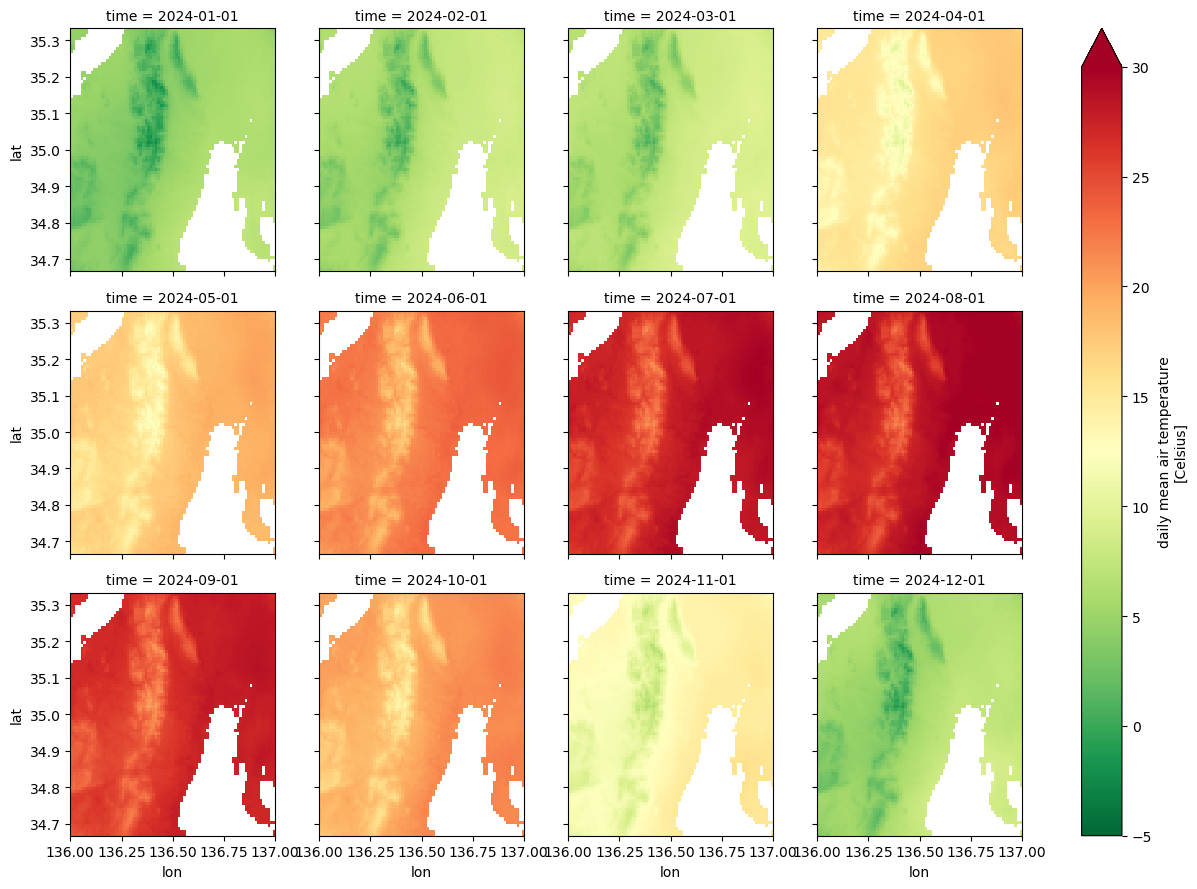

In [19]:
Tmonmea.plot(y='lat',x='lon', col="time", col_wrap=4,
         vmin=-5.0, vmax=30.0, cmap='RdYlGn_r')    

　如何でしょうか。メッシュ農業気象データの操作性は、DataArrayで飛躍的に高めることが可能であることが感じられたかと思います。

以上で、チュートリアル７「データの集計」は終わりです。お疲れ様でした。